In [2]:
import numpy as np
import seaborn as sns
import seaborn.objects as so
import pandas as pd

sube2023 = pd.read_csv("dataSets/dat-ab-usos-2023.csv")
#ordeno las columnas del df

print(sube2023.head())

  DIA_TRANSPORTE                                     NOMBRE_EMPRESA  \
0     2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
1     2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
2     2023-01-01                                 EMPRESA BATAN S.A.   
3     2023-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
4     2023-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   

              LINEA AMBA TIPO_TRANSPORTE JURISDICCION     PROVINCIA  \
0                 1   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
1                2B   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
2  BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   
3   BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL  BUENOS AIRES   
4   BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   

            MUNICIPIO  CANTIDAD DATO_PRELIMINAR  
0            MERCEDES        61              NO  
1            MERCEDES        11              N

In [4]:
sube2020 = pd.read_csv("dataSets/dat-ab-sube-2020.csv")
sube2021 = pd.read_csv("dataSets/dat-ab-sube-2021.csv")
sube2022 = pd.read_csv("dataSets/dat-ab-sube-2022.csv")

In [5]:
sube2020 = sube2020.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2020["FECHA"] = pd.to_datetime(sube2020["FECHA"], format = '%Y-%m-%d')
sube2020["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2020["FECHA"]]
sube2020["FECHA_ORDINAL"] = [fecha.day for fecha in sube2020["FECHA"]]
sube2020["FECHA_MES"] = [fecha.Wedth for fecha in sube2020["FECHA"]]

sube2021 = sube2021.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2021["FECHA"] = pd.to_datetime(sube2021["FECHA"], format = '%Y-%m-%d')
sube2021["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2021["FECHA"]]
sube2021["FECHA_ORDINAL"] = [fecha.day for fecha in sube2021["FECHA"]]
sube2021["FECHA_MES"] = [fecha.Wedth for fecha in sube2021["FECHA"]]

sube2022 = sube2022.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
sube2022["FECHA"] = pd.to_datetime(sube2022["FECHA"], format = '%Y-%m-%d')
sube2022["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2022["FECHA"]]
sube2022["FECHA_ORDINAL"] = [fecha.day for fecha in sube2022["FECHA"]]
sube2022["FECHA_MES"] = [fecha.month for fecha in sube2022["FECHA"]]

In [37]:
subeAmba2020 = sube2020[(sube2020["AMBA"] == "SI") & (sube2020["DATO_PRELIMINAR"] == "NO")]
datos_amba2020 = subeAmba2020[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2020 = datos_amba2020.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s))  

subeAmba2021 = sube2021[(sube2021["AMBA"] == "SI") & (sube2021["DATO_PRELIMINAR"] == "NO")]
datos_amba2021 = subeAmba2021[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2021 = datos_amba2021.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s)) 

subeAmba2022 = sube2022[(sube2022["AMBA"] == "SI") & (sube2022["DATO_PRELIMINAR"] == "NO")]
datos_amba2022 = subeAmba2022[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
datos_amba2022 = datos_amba2022.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s))

In [ ]:
print(subeAmba2020.shape[0], subeAmba2021.shape[0], subeAmba2022.shape[0], subeAmba.shape[0])

# Procesamiento de datos
**Ejercicio 1**

a) Visualizar el tipo de datos de cada columna. Transformar la columna DIA_TRANSPORTE
para que sea reconocida como una fecha.
Sugerencia: investigar la función to_datetime de pandas. Para completar el argumento
format, revisar la documentación de datetime

In [6]:
sube2023["DIA_TRANSPORTE"] = pd.to_datetime(sube2023["DIA_TRANSPORTE"], format = '%Y-%m-%d')

sube2023 = sube2023.rename(columns = {"DIA_TRANSPORTE" : "FECHA"})
#Verificamos que se convirtio en el tipo que queremos
sube2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO


 Agregar tres columnas al DataFrame:

-  FECHA_DIA : debe indicar el nombre del día de la semana correspondiente a
DIA_TRANSPORTE

-  FECHA_ORDINAL : debe indicar el ordinal correspondiente a DIA_TRANSPORTE (por
ejemplo, a 2023-01-01 le corresponde 1, a 2023-01-02 le corresponde 2 y así sucesiva-
mente). Debe ser un entero (int).

- . FECHA_MES : debe indicar el mes correspondiente a DIA_TRANSPORTE
Sugerencia: investigar el método apply de DataFrame.

In [7]:
#Tomamos solo el prefijo del dia
sube2023["FECHA_DIA"] = [fecha.day_name()[0:3] for fecha in sube2023["FECHA"]]
print(sube2023.head())


       FECHA                                     NOMBRE_EMPRESA  \
0 2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
1 2023-01-01  MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...   
2 2023-01-01                                 EMPRESA BATAN S.A.   
3 2023-01-01               COMPAÑIA  DE TRANSPORTE VECINAL S.A.   
4 2023-01-01           EMPRESA DE TRANSPORTE PERALTA RAMOS SACI   

              LINEA AMBA TIPO_TRANSPORTE JURISDICCION     PROVINCIA  \
0                 1   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
1                2B   SI       COLECTIVO    MUNICIPAL  BUENOS AIRES   
2  BS_AS_LINEA 715M   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   
3   BS_AS_LINEA_326   SI       COLECTIVO   PROVINCIAL  BUENOS AIRES   
4   BS_AS_LINEA_512   NO       COLECTIVO    MUNICIPAL  BUENOS AIRES   

            MUNICIPIO  CANTIDAD DATO_PRELIMINAR FECHA_DIA  
0            MERCEDES        61              NO       Sun  
1            MERCEDES        11              NO   

In [24]:
sube2023["FECHA_ORDINAL"] = [fecha.day for fecha in sube2023["FECHA"]]
sube2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,1


In [25]:
sube2023["FECHA_MES"] = [fecha.month for fecha in sube2023["FECHA"]]
sube2023.head()

,FECHA,NOMBRE_EMPRESA,LINEA,AMBA,TIPO_TRANSPORTE,JURISDICCION,PROVINCIA,MUNICIPIO,CANTIDAD,DATO_PRELIMINAR,FECHA_DIA,FECHA_MES,FECHA_ORDINAL
0,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,1,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,61,NO,Sun,1,1
1,2023-01-01,MUNICIPALIDAD DE MERCEDES PROVINCIA DE BUENOS ...,2B,SI,COLECTIVO,MUNICIPAL,BUENOS AIRES,MERCEDES,11,NO,Sun,1,1
2,2023-01-01,EMPRESA BATAN S.A.,BS_AS_LINEA 715M,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1707,NO,Sun,1,1
3,2023-01-01,COMPAÑIA DE TRANSPORTE VECINAL S.A.,BS_AS_LINEA_326,SI,COLECTIVO,PROVINCIAL,BUENOS AIRES,SN,438,NO,Sun,1,1
4,2023-01-01,EMPRESA DE TRANSPORTE PERALTA RAMOS SACI,BS_AS_LINEA_512,NO,COLECTIVO,MUNICIPAL,BUENOS AIRES,GENERAL PUEYRREDON,1189,NO,Sun,1,1


**Ejercicio 2**

Crear el DataFrame datos_amba, el cual sólo debe tener datos de AMBA y debe excluir datos
preliminares. Además, al ejecutar datos_amba.head() debe observarse el siguiente orden y
formato de columnas: 

In [41]:
#pequeño detalle, pero cambiamos el nombre "datos_amba" sugerido en el tp por "datos_amba2023" con el año
#incluido pues más adelante usaremos este mismo codigo para los df de 2020, 2021 y 2022.
subeAmba2023 = sube2023[(sube2023["AMBA"] == "SI") & (sube2023["DATO_PRELIMINAR"] == "NO")]
datos_amba2023 = subeAmba2023[["FECHA","FECHA_DIA","FECHA_MES","FECHA_ORDINAL","JURISDICCION","LINEA","CANTIDAD", "TIPO_TRANSPORTE"]]
#Renombro de acorde a lo pedido
datos_amba2023 = datos_amba2023.rename(columns = lambda s : "pasajeros" if s == "CANTIDAD"  else str.lower(s))  

datos_amba2023.head()


,fecha,fecha_dia,fecha_mes,fecha_ordinal,jurisdiccion,linea,pasajeros,tipo_transporte
0,2023-01-01,Sun,1,1,MUNICIPAL,1,61,COLECTIVO
1,2023-01-01,Sun,1,1,MUNICIPAL,2B,11,COLECTIVO
3,2023-01-01,Sun,1,1,PROVINCIAL,BS_AS_LINEA_326,438,COLECTIVO
5,2023-01-01,Sun,1,1,MUNICIPAL,BS_AS_LINEA_514,3067,COLECTIVO
6,2023-01-01,Sun,1,1,MUNICIPAL,BS_AS_LINEA_522,332,COLECTIVO


**Ejercicio 3.**

Utilizando datos_amba, identificar

- la proporcion de la cantidad total anual de pasajeros que le corresponda a cada medio de transporte

In [124]:
#La cantidad de pasajeros en cada medio de trasporte, divido el total de pasajeros, 
#multiplicado por 100 para tener porcentajes del 0% al 100%
PropXTransporte = (datos_amba.groupby("tipo_transporte")["pasajeros"].sum()/datos_amba["pasajeros"].sum() )*100
print(PropXTransporte)

tipo_transporte
COLECTIVO    83.764488
SUBTE         6.809700
TREN          9.425812
Name: pasajeros, dtype: float64


- La tupla (mes, línea de subte) donde viajó la mayor cantidad de pasajeros

In [125]:
#Me creo un nuevo dataset usando el de datos_amba, que contenga unicamente los datos relevantes,
#agregando la cantidad de pasajeros por linea por mes
GenteXLineaXMesDF= datos_amba[datos_amba["tipo_transporte"] == "SUBTE"].groupby(["fecha_mes","linea"])["pasajeros"].sum().reset_index()

#idxmax me da el indice del maximo en la fila cantidad
filaMax = GenteXLineaXMesDF.loc[GenteXLineaXMesDF["pasajeros"].idxmax()]
MesLinea = (filaMax["fecha_mes"] , filaMax["linea"])
print(MesLinea)
 

(8, 'LINEA_B')


- El día hábil con menor desvío estándar en cantidad de pasajeros




In [126]:
#Filtro por dias Hables
amba_dias_habiles = datos_amba[(datos_amba["fecha_dia"] != ("Sat")) & (datos_amba["fecha_dia"] != ("Sun"))]
#Tomo dataframe solo con las columnas que me interesan, agregando la cantidad de pasajeros por dia
pasajeros_x_dia = amba_dias_habiles.groupby(["fecha_dia","fecha"])["pasajeros"].sum().reset_index()
#A cada uno de los dias les tomo la desviacion estandar, y devuelvo el indice del minimo
pasajeros_x_dia.groupby("fecha_dia")["pasajeros"].std().idxmin()

'Wed'

# 4. Analisis Exploratorio

***PRIMERA HIPÓTESIS***

Afortunadamente, hoy en día podemos decir que la pandemia COVID-19 es algo del pasado "cercano", pero pasado en fin.

Si bien hace tiempo que las cosas retomaron su ritmo natural, lo que más costó reestablecerse fueron los bares, boliches, clubs, conciertos... entre otros lugares recreativos que uno suele atender los fines de semana.

En un principio, nuestra primera idea de juguete para entrar un poco en calor y conocer más los datos, fue analizar el uso de transporte público centrandonos en el día **sábado** a lo largo de 2020 hasta 2023 con la intención de poder observar como afectó la pandemia al día mas "social" de la semana en cuanto a movimiento de gente y transporte.

Nuestra hipótesis es que la cantidad de pasajeros que viajan los días sabados a lo largo de estos 4 años va a aumentar de manera creciente. Observando su mayor pendiente en 2021 y como esta se va normalizando en 2022/2023, ya que fue allí cuando la vida social volvió a su plenitud.

Veamos con qué nos encontramos en el medio de este proceso...







Primero filtramos los df por los días sabados. Descartamos los meses ENERO y FEBRERO ya que los consideramos un valor outlier para este análisis; al ser meses de vacaciones, los transportes públicos son notoriamente menos usados.


In [11]:
sabados2020 = sube2020[(sube2020["FECHA_DIA"] == "Sat") & (sube2020["FECHA_MES"] != 1) & (sube2020["FECHA_MES"] != 2)]
sabados2021 = sube2021[(sube2021["FECHA_DIA"] == "Sat") & (sube2021["FECHA_MES"] != 1) & (sube2021["FECHA_MES"] != 2)]
sabados2022 = sube2022[(sube2022["FECHA_DIA"] == "Sat") & (sube2022["FECHA_MES"] != 1) & (sube2022["FECHA_MES"] != 2)]
sabados2023 = sube2023[(sube2023["FECHA_DIA"] == "Sat") & (sube2023["FECHA_MES"] != 1) & (sube2023["FECHA_MES"] != 2)]

In [12]:
#agrupamos los df por cantidad de pasajeros *POR MES*
sabados2020 = sabados2020.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sabados2021 = sabados2021.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sabados2022 = sabados2022.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sabados2023 = sabados2023.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sabados2023.head()


,FECHA_MES,CANTIDAD
0,3,33790974
1,4,46367457
2,5,35712674
3,6,36285966
4,7,47913775


In [21]:
#concatenamos los 4 dfs armados en uno solo para poder graficar.
sabados = pd.concat([sabados2020, sabados2021, sabados2022, sabados2023], axis = 0).reset_index(drop=True)
sabados.head()

,FECHA_MES,CANTIDAD
0,3,17848246
1,4,5898000
2,5,10077366
3,6,8589886
4,7,7457913


El momento de la verdad... ¡A graficar!

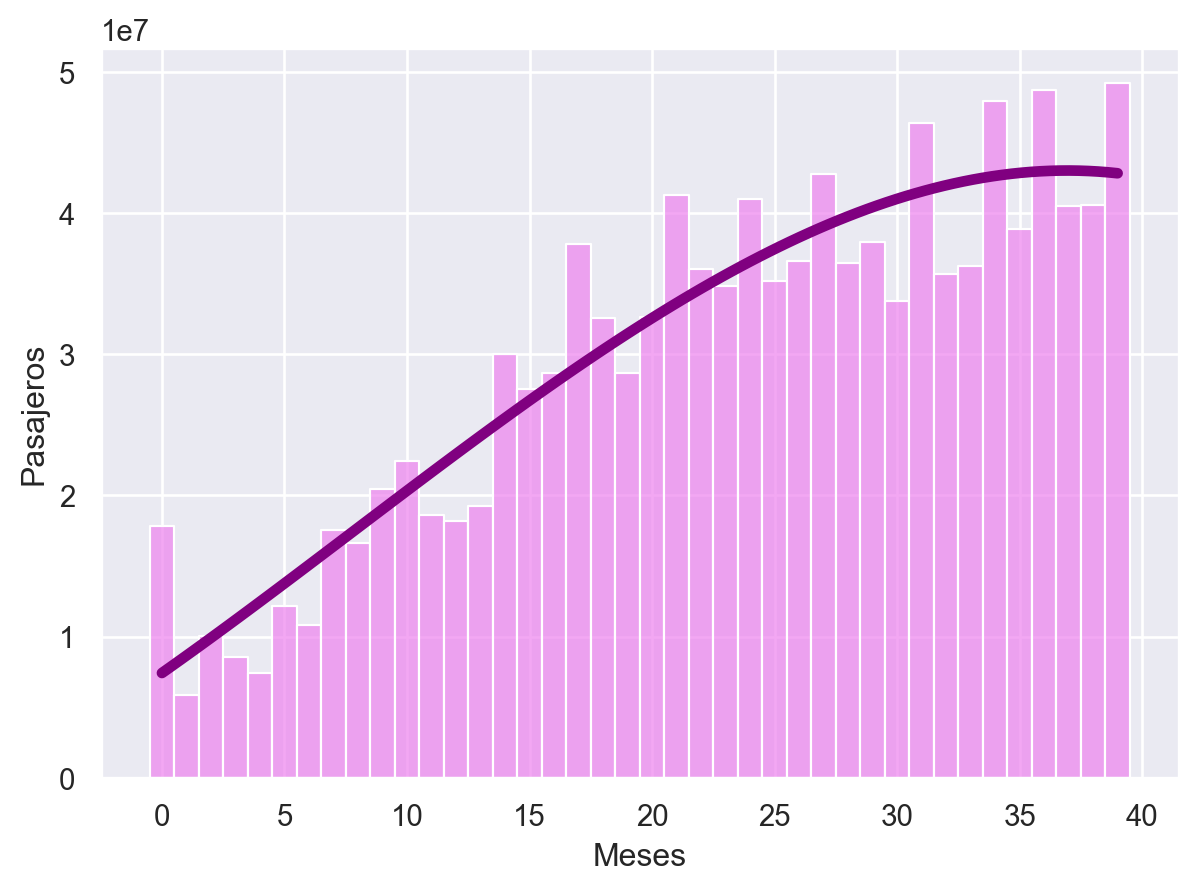

In [14]:
(
so.Plot(sabados.reset_index(), "index", "CANTIDAD")
.add(so.Bars(color = "violet"))
.add(so.Line(color = "purple", linewidth = 4), so.PolyFit(3))
.label(x="Meses", y="Pasajeros")
.scale(width=12, height=6)
)

Parece que el gráfico sigue la idea que teníamos! Que alegría!!! Que pedazos de científicos forma la UBA!!!!!! El que sabe sabe y el que no a la UADE!!!!!!!!

Antes de sacar conclusiones apresuradas, pensemos si hay algun otro valor además de nuestra hipótesis que pueda estar afectando a este crecimiento constante...

Veamos el comportamiento pero teniendo en cuenta todos los días de la semana (seguimos excluyendo los meses enero y febrero).

In [16]:
sin_vacas2020 = sube2020[(sube2020["FECHA_MES"] != 1) & (sube2020["FECHA_MES"] != 2)]
sin_vacas2021 = sube2021[(sube2021["FECHA_MES"] != 1) & (sube2021["FECHA_MES"] != 2)]
sin_vacas2022 = sube2022[(sube2022["FECHA_MES"] != 1) & (sube2022["FECHA_MES"] != 2)]
sin_vacas2023 = sube2023[(sube2023["FECHA_MES"] != 1) & (sube2023["FECHA_MES"] != 2)]

In [17]:
sin_vacas2020 = sin_vacas2020.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sin_vacas2021 = sin_vacas2021.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sin_vacas2022 = sin_vacas2022.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()
sin_vacas2023 = sin_vacas2023.groupby("FECHA_MES")["CANTIDAD"].sum().reset_index()

In [47]:
sin_vacas = pd.concat([sin_vacas2020, sin_vacas2021, sin_vacas2022, sin_vacas2023], axis = 0).reset_index(drop=True)
sin_vacas.head()

,FECHA_MES,CANTIDAD
0,3,222294728
1,4,59187842
2,5,77753791
3,6,83993096
4,7,75554166


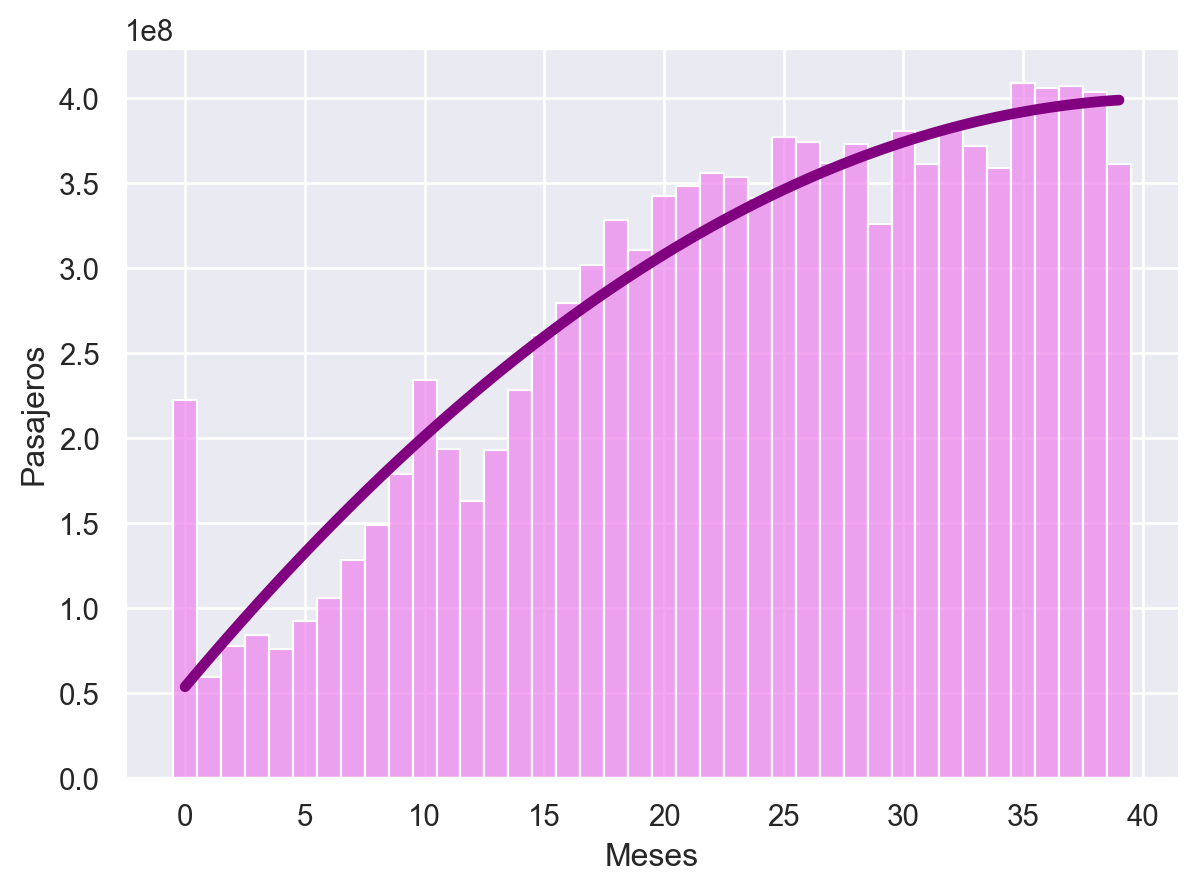

In [19]:
(
so.Plot(sin_vacas.reset_index(), "index", "CANTIDAD")
.add(so.Bars(color = "violet"))
.add(so.Line(color = "purple", linewidth = 4), so.PolyFit(2))
.label(x="Meses", y="Pasajeros")
.scale(width=12, height=6)
)

Che pucha que raro... también se vé un aumento notablemente creciente del uso del transporte sin distinción de día. Acá hay gato encerrado, vamos a googlear un poco...

<img src="dataSets/sube.noticias.png">


*Fuente: argentina.gob.ar/ - noticias del año 2023*

-_-'

Al parecer a lo largo del tiempo en el que estuvimos analizando el aumento del uso del transporte, también fue aumentando la implementación de la tarjeta SUBE en distintos puntos del país, lo cual está afectando directamente a nuestro caso.

De hecho, si prestamos más atención a la cantidad de filas que tienen los 4 datasets originales por separado...

In [20]:
print(sube2020.shape[0], sube2021.shape[0], sube2022.shape[0], sube2023.shape[0])

356628 410644 439337 472291


La cantidad de datos registrados también fue aumentando **notablemente** a lo largo de los años.
 
Finalmente, ya no podemos adjudicar el aumento en forma creciente de nuestro primer gráfico *(unicamente)* a la lenta apertura y normalización de eventos sociales los días sábados, si no que también juega un rol importantisimo el aumento de implementacion de la tarjeta SUBE a lo largo del país, y también la diferencia de datos registrados en cada dataset.

Ahora probamos solo en AMBA

In [57]:
sin_vacas_amba2020 = datos_amba2020[(datos_amba2020["fecha_mes"] != 1) & (datos_amba2020["fecha_mes"] != 2)]
sin_vacas_amba2020 = sin_vacas_amba2020.groupby("fecha_mes")["pasajeros"].sum().reset_index() 

sin_vacas_amba2021 = datos_amba2021[(datos_amba2021["fecha_mes"] != 1) & (datos_amba2021["fecha_mes"] != 2)]
sin_vacas_amba2021 = sin_vacas_amba2021.groupby("fecha_mes")["pasajeros"].sum().reset_index() 

sin_vacas_amba2022 = datos_amba2022[(datos_amba2022["fecha_mes"] != 1) & (datos_amba2022["fecha_mes"] != 2)]
sin_vacas_amba2022 = sin_vacas_amba2022.groupby("fecha_mes")["pasajeros"].sum().reset_index() 

sin_vacas_amba2023 = datos_amba2023[(datos_amba2023["fecha_mes"] != 1) & (datos_amba2023["fecha_mes"] != 2)]
sin_vacas_amba2023 = sin_vacas_amba2023.groupby("fecha_mes")["pasajeros"].sum().reset_index()

In [58]:
sin_vacas_amba = pd.concat([sin_vacas_amba2020, sin_vacas_amba2021, sin_vacas_amba2022, sin_vacas_amba2023], axis = 0).reset_index(drop=True)
sin_vacas_amba.head()

,fecha_mes,pasajeros
0,3,188722781
1,4,51183895
2,5,67223592
3,6,69452778
4,7,62449378


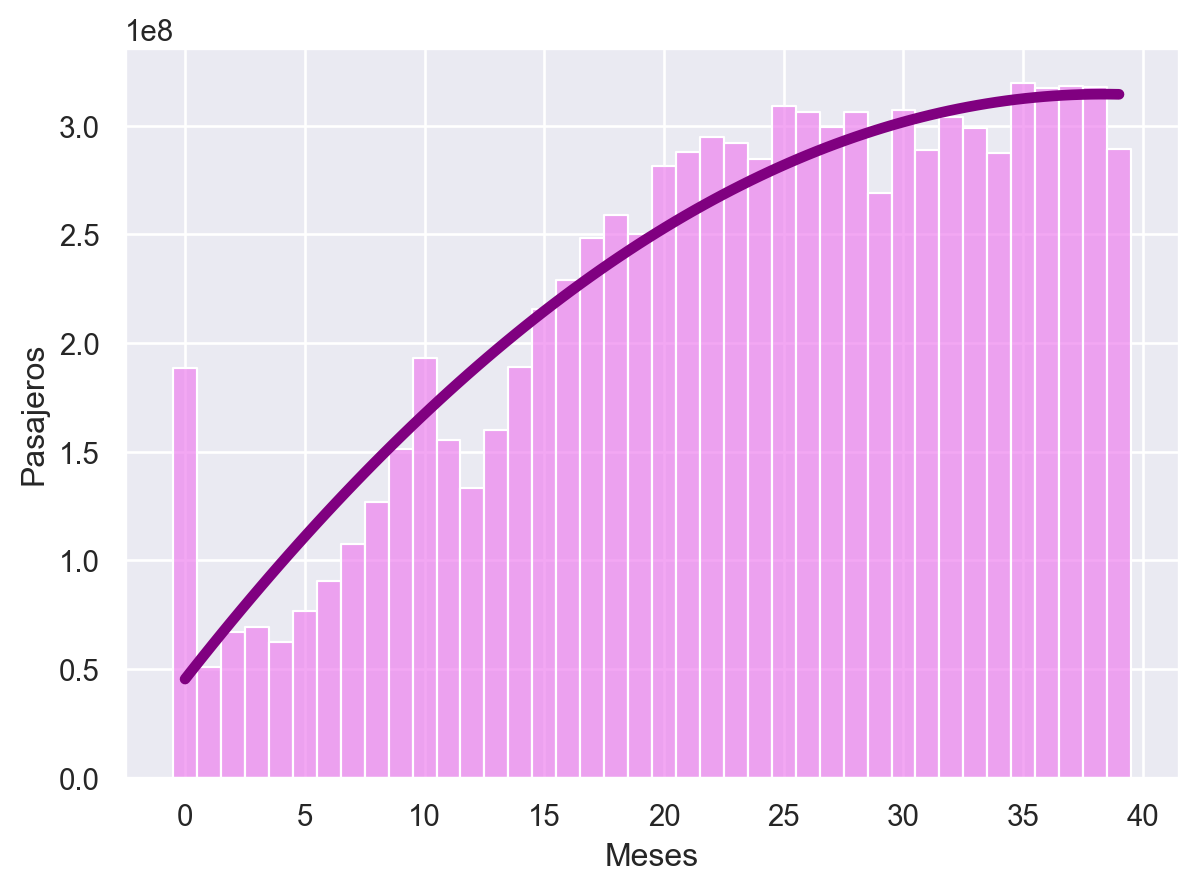

In [59]:
(
so.Plot(sin_vacas_amba.reset_index(), "index", "pasajeros")
.add(so.Bars(color = "violet"))
.add(so.Line(color = "purple", linewidth = 4), so.PolyFit(2))
.label(x="Meses", y="Pasajeros")
.scale(width=12, height=6)
)

In [68]:
sabados_amba2020 = datos_amba2020[(datos_amba2020["fecha_dia"] == "Sat") & (datos_amba2020["fecha_mes"] != 1) & (datos_amba2020["fecha_mes"] != 2)]
sabados_amba2020 = sabados_amba2020.groupby("fecha_mes")["pasajeros"].sum().reset_index()

sabados_amba2021 = datos_amba2021[(datos_amba2021["fecha_dia"] == "Sat") & (datos_amba2021["fecha_mes"] != 1) & (datos_amba2021["fecha_mes"] != 2)]
sabados_amba2021 = sabados_amba2021.groupby("fecha_mes")["pasajeros"].sum().reset_index()

sabados_amba2022 = datos_amba2022[(datos_amba2022["fecha_dia"] == "Sat") & (datos_amba2022["fecha_mes"] != 1) & (datos_amba2022["fecha_mes"] != 2)]
sabados_amba2022 = sabados_amba2022.groupby("fecha_mes")["pasajeros"].sum().reset_index()

sabados_amba2023 = datos_amba2023[(datos_amba2023["fecha_dia"] == "Sat") & (datos_amba2023["fecha_mes"] != 1) & (datos_amba2023["fecha_mes"] != 2)]
sabados_amba2023 = sabados_amba2023.groupby("fecha_mes")["pasajeros"].sum().reset_index()

In [71]:
sabados_amba = pd.concat([sabados_amba2020, sabados_amba2021, sabados_amba2022, sabados_amba2023], axis = 0).reset_index(drop=True)

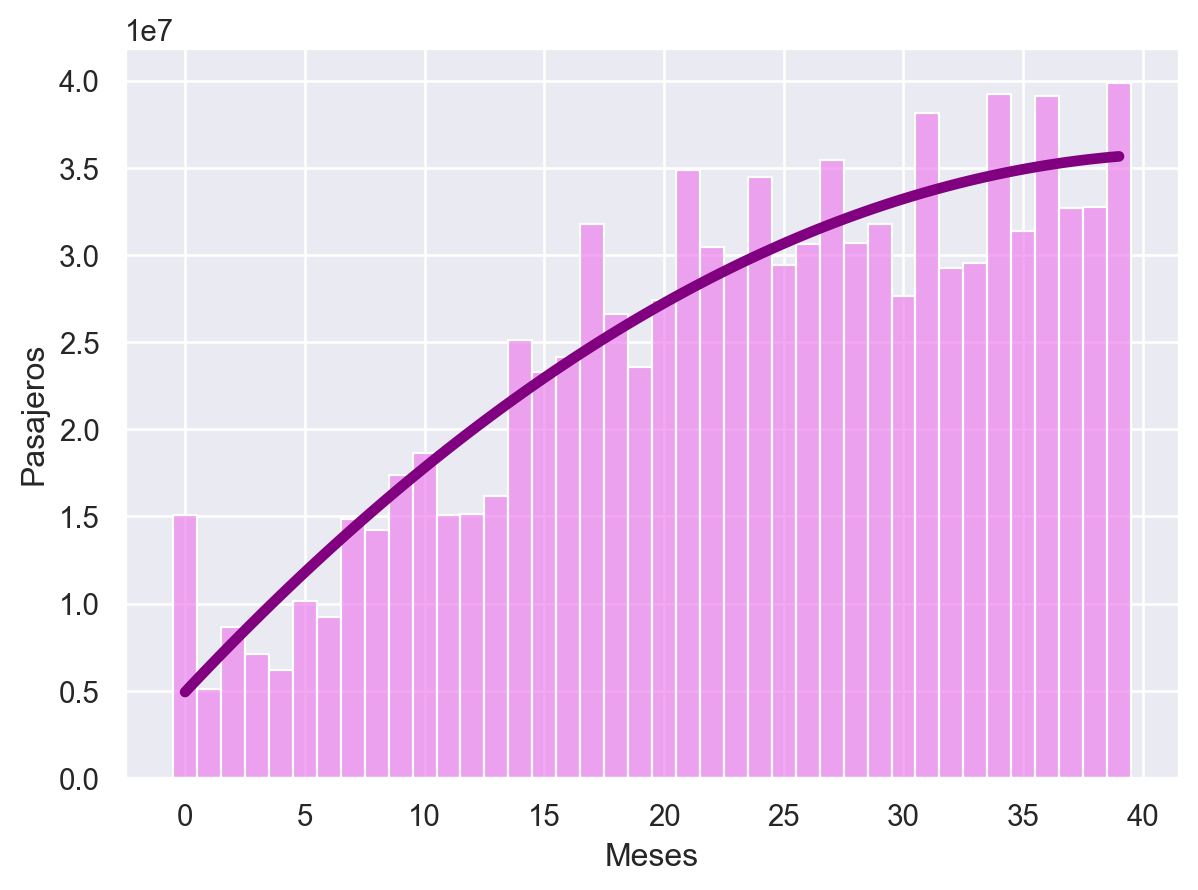

In [72]:
(
so.Plot(sabados_amba.reset_index(), "index", "pasajeros")
.add(so.Bars(color = "violet"))
.add(so.Line(color = "purple", linewidth = 4), so.PolyFit(2))
.label(x="Meses", y="Pasajeros")
.scale(width=12, height=6)
)

In [78]:
miercoles_amba2020 = datos_amba2020[(datos_amba2020["fecha_dia"] == "Wed") & (datos_amba2020["fecha_mes"] != 1) & (datos_amba2020["fecha_mes"] != 2)]
miercoles_amba2020 = miercoles_amba2020.groupby("fecha_mes")["pasajeros"].sum().reset_index()

miercoles_amba2021 = datos_amba2021[(datos_amba2021["fecha_dia"] == "Wed") & (datos_amba2021["fecha_mes"] != 1) & (datos_amba2021["fecha_mes"] != 2)]
miercoles_amba2021 = miercoles_amba2021.groupby("fecha_mes")["pasajeros"].sum().reset_index()

miercoles_amba2022 = datos_amba2022[(datos_amba2022["fecha_dia"] == "Wed") & (datos_amba2022["fecha_mes"] != 1) & (datos_amba2022["fecha_mes"] != 2)]
miercoles_amba2022 = miercoles_amba2022.groupby("fecha_mes")["pasajeros"].sum().reset_index()

miercoles_amba2023 = datos_amba2023[(datos_amba2023["fecha_dia"] == "Wed") & (datos_amba2023["fecha_mes"] != 1) & (datos_amba2023["fecha_mes"] != 2)]
miercoles_amba2023 = miercoles_amba2023.groupby("fecha_mes")["pasajeros"].sum().reset_index()

In [79]:
miercoles_amba = pd.concat([miercoles_amba2020, miercoles_amba2021, miercoles_amba2022, miercoles_amba2023], axis = 0).reset_index(drop=True)

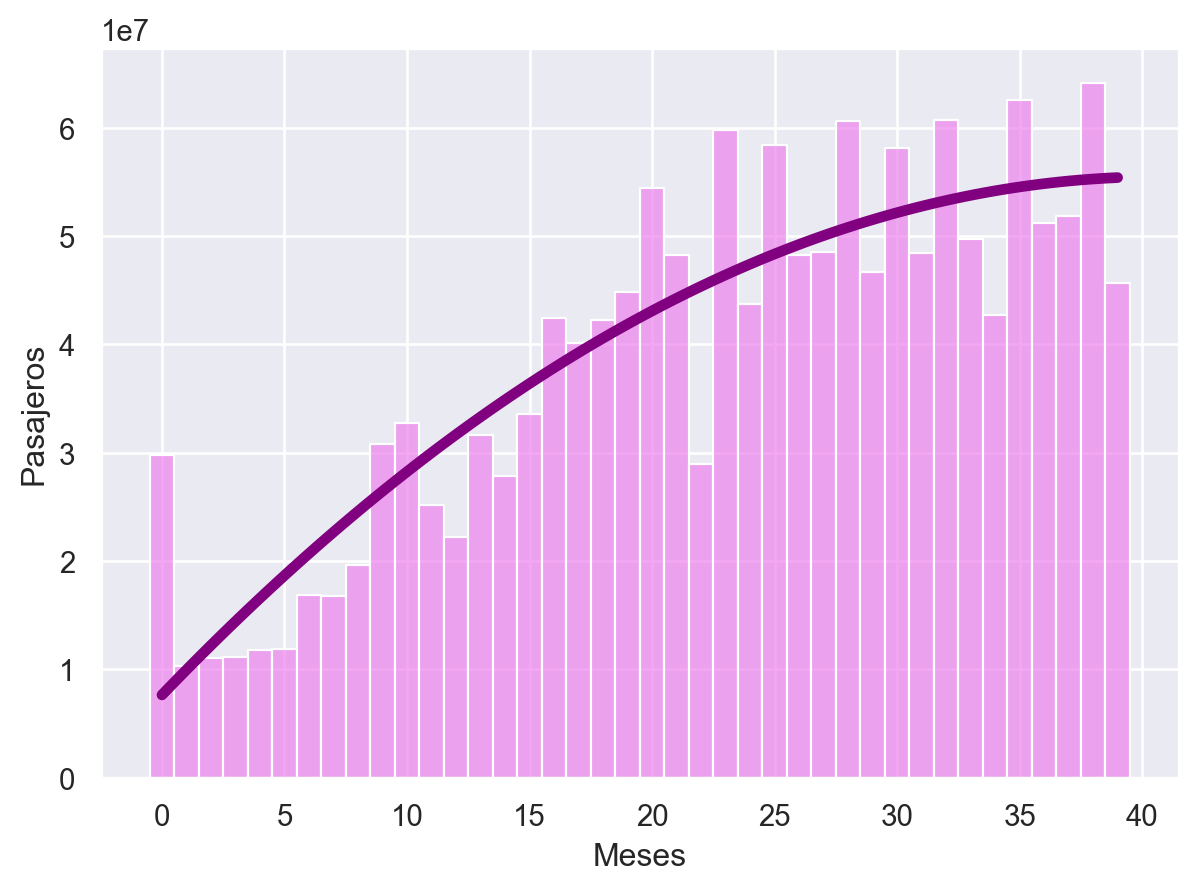

In [80]:
(
so.Plot(miercoles_amba.reset_index(), "index", "pasajeros")
.add(so.Bars(color = "violet"))
.add(so.Line(color = "purple", linewidth = 4), so.PolyFit(2))
.label(x="Meses", y="Pasajeros")
.scale(width=12, height=6)
)

# 5. Modelado

In [127]:
datos_ColectivoJN = datos_amba[(datos_amba["tipo_transporte"] == "COLECTIVO") & (datos_amba["jurisdiccion"] == "NACIONAL") ]
cols = datos_ColectivoJN.linea.unique() # Los nombres de las lineas de colectivo

pasajeros_por_linea = pd.DataFrame()

for col in cols:
    datos_linea = datos_ColectivoJN[datos_ColectivoJN.linea == col][["fecha", "pasajeros"]]
                           
    datos_linea = datos_linea.set_index("fecha").rename(columns = {"pasajeros" : col })
    pasajeros_por_linea = pd.concat([pasajeros_por_linea,datos_linea], axis = 1)

display(pasajeros_por_linea.head())

,BS_ASLINEA_123,BSAS_LINEA_002,BSAS_LINEA_009,BSAS_LINEA_010,BSAS_LINEA_015,BSAS_LINEA_017,BSAS_LINEA_019,BSAS_LINEA_020,BSAS_LINEA_021,BSAS_LINEA_022,...,LINEA 5,LINEA 50,LINEA 6,LINEA 7,LINEA 76,LINEA 8,LINEA_099,LINEA_119_AMBA,LINEA_164_AMBA,LINEA 119
fecha,,,,,,,,,,,,,,,,,,,,,
2023-01-01,1681,5670,5644,5177,9109,7013,1604,2617,11235,2202,...,4832.0,4839,2449,2184,3797,5317,1882,1573.0,3210,NaN
2023-01-02,9440,21759,23284,21176,45269,29962,13921,11934,55611,13823,...,20333.0,16221,10486,12774,17374,23250,10322,7345.0,19362,NaN
2023-01-03,9836,25014,24830,23662,50604,32301,15769,12561,60175,16078,...,23044.0,17982,12211,14128,18963,26066,11328,8016.0,22297,NaN
2023-01-04,10540,24755,25405,23806,52873,33659,16172,13366,61721,16206,...,23041.0,18448,12193,13949,19860,26294,11981,7925.0,21784,NaN
2023-01-05,10408,25772,26489,24688,53436,35182,16569,12929,62510,16863,...,23928.0,18481,12888,14668,21235,27216,11787,7597.0,22972,NaN
